In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../extraction_scripts')
import map_fxn as mf
import numpy as np
import netCDF4 as nc
from matplotlib.patches import Rectangle

from salishsea_tools import (
    viz_tools)



In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

    # STRATOGEM STATION S3(lat,lon)=(49 7.5 N, 123 33.5 W)
    'S3': {
        'lon lat': (-123.558, 49.125),
        'NEMO grid ji': (450, 258),
        'GEM2.5 grid ji': (138, 144),

In [5]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

### edgelord things

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar_noedge =np.delete(d_stn_xar,edge)
d_stn_yar_noedge = np.delete(d_stn_yar,edge)

# print(np.size(d_stn_xar))

#'NEMO grid ji': (450, 258), #262 #452, 

## station 417 is our winner!!
print(np.where((d_stn_yar == 452) & (d_stn_xar == 262)))
#d_stn_yar[(d_stn_yar > 440) & (d_stn_yar < 465)]

(array([417]),)


In [6]:
# 

In [7]:
## extracting signals
yr = 2014
# one year
bdir = \
f'/data/tjarniko/MEOPAR/analysis_tereza/\
notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/'

#wind

#fresh water index
fwidat = nc.Dataset(bdir+ 'FWI_TS/stn_417_fwi4m_data_sp10_threshold50.nc')
fwi = fwidat['freshwater_index'][:]
#
halodat = nc.Dataset(bdir+'HALO_TS/stn_417halo_depth_sp10.nc')
halo = halodat['halocline_depth'][:]

veddat = nc.Dataset(bdir+'VED_TS/stn_417avg_ved_sp10.nc')
ved = veddat['daily_ved'][:]

#wind dat
winddat = nc.Dataset(bdir+'WIND_TS/stn_417_wind_data_sp10.nc')
wind = winddat['wind_energy'][:]


#biodat
biodat = nc.Dataset(bdir+'BIO_TS/stn_417_sp10.nc')
cili = biodat['MYRI'][:]/218509 #to get to per m2
flag = biodat['PHY2'][:]/218509
diat = biodat['PHY'][:]/218509



daze = np.arange(0,365,1)

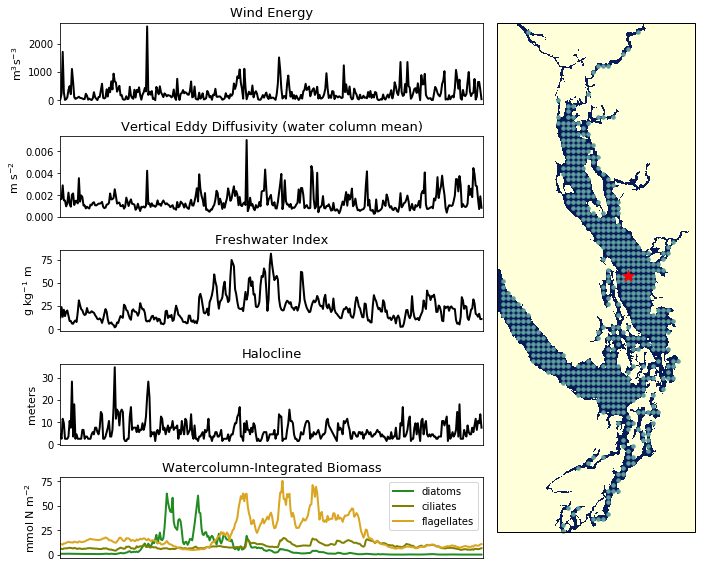

In [12]:
fact = .99
tfs = 11
markersize = 12
fig = plt.figure(figsize=(10.1*fact, 8.09*fact))
plt.rcParams['image.cmap'] = 'YlGnBu'

ax5 = plt.subplot2grid((5,6), (0,0), colspan=4, rowspan=1)
ax5.plot(daze,wind,'k-',lw = 2); ax5.set_xlim(0,365)
ax5.set_title('Wind Energy', fontsize = tfs + 2); ax5.set_xticks([])
ax5.set_ylabel('m$^{3}$s$^{-3}$', fontsize = tfs)

ax5 = plt.subplot2grid((5,6), (1,0), colspan=4, rowspan=1)
ax5.plot(daze,ved,'k-',lw = 2); ax5.set_xlim(0,365)
ax5.set_title('Vertical Eddy Diffusivity (water column mean)', fontsize = tfs + 2); ax5.set_xticks([])
ax5.set_ylabel('m s$^{-2}$', fontsize = tfs)

ax5 = plt.subplot2grid((5,6), (2,0), colspan=4, rowspan=1)
ax5.plot(daze,fwi,'k-',lw = 2); ax5.set_xlim(0,365)
ax5.set_title('Freshwater Index', fontsize = tfs + 2); ax5.set_xticks([])
ax5.set_ylabel('g kg$^{-1}$ m', fontsize = tfs)

#halocline depth
ax5 = plt.subplot2grid((5,6), (3,0), colspan=4, rowspan=1)
ax5.plot(daze,halo,'k-',lw = 2); ax5.set_xlim(0,365)
ax5.set_title('Halocline', fontsize = tfs + 2); ax5.set_xticks([])
ax5.set_ylabel('meters', fontsize = tfs)

ax5 = plt.subplot2grid((5,6), (4,0), colspan=4, rowspan=1)
ax5.plot(daze,diat,color = 'forestgreen',lw = 2, label = 'diatoms'); ax5.set_xlim(0,365)
ax5.plot(daze,cili, color = 'olive',lw = 2, label = 'ciliates'); ax5.set_xlim(0,365)
ax5.plot(daze,flag,color = 'goldenrod',lw = 2, label = 'flagellates'); ax5.set_xlim(0,365)
ax5.legend(loc = 'upper right')
ax5.set_title('Watercolumn-Integrated Biomass', fontsize = tfs + 2); ax5.set_xticks([])
ax5.set_ylabel('mmol N m$^{-2}$', fontsize = tfs)

ax = plt.subplot2grid((5,6), (0,4), colspan=2, rowspan=5)

viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
pts = ax.scatter(d_stn_xar_noedge,d_stn_yar_noedge,\
                 s=markersize,c='cadetblue',marker='o')
pts = ax.scatter(d_stn_xar[417],d_stn_yar[417],\
                 s=140 ,c='red',marker='*')
ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 
ax.patch.set_visible(False)
ax.axis('off')
ax.add_patch(Rectangle([0,0],397,898,\
                       fill=False, edgecolor='k', zorder=10))

plt.tight_layout()

#out=ax.set(title='Domain Extent')

fig.savefig('./paper_figs/MF03_samplesignal.pdf', bbox_inches='tight')